<a href="https://colab.research.google.com/github/vipra88/Movie-ML-NLP-Recommendation-System/blob/main/Movie_ML_and_recommedation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised


# **Project Summary -**

Write the summary here within 500-600 words.


The Movies Dataset
Metadata on over 45,000 movies. 26 million ratings from over 270,000 users.
Last Updated: 7 years ago (Version 7)

About this Dataset
Context
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

Content
This dataset consists of the following files:

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Dataset Overview:

Movie Details: Such as title, release date, and runtime.

Financial Metrics: Including budget and revenue figures.

Popularity Metrics: Such as popularity scores and vote counts.

Casting Information: Names of the main cast members.

Production Details: Involving production companies and directors.

Genre Classification: Categorizing movies into different genres.

Additional Information: Such as taglines, keywords, and an overview of the movie.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [362]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import time
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [363]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [364]:
# Load Dataset

movies= pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
credit= pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')



In [365]:
# merge two data file
movies=movies.merge(credit,on='title')

### Dataset First View

In [366]:
# Dataset First Look

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Dataset Rows & Columns count

In [367]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {movies.shape[0]}, Columns= {movies.shape[1]}")

Rows and Column count in the Dataset: Rows= 4809, Columns= 23


### Dataset Information

In [368]:
# Dataset Info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

#### Duplicate Values

In [369]:
 # Dataset Duplicate Value Count
duplicate_count = movies.duplicated().sum()
print(f"The total number of duplicated observations in the dataset: {duplicate_count}")

The total number of duplicated observations in the dataset: 0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [370]:
# Dataset Columns
print(f"Available columns:\n{movies.columns.to_list()}")

Available columns:
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast', 'crew']


In [371]:
# Dataset Describe
movies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,4809.0,NaN,NaN,NaN,29027802.936369,40704731.389679,0.0,780000.0,15000000.0,40000000.0,380000000.0
genres,4809,1175,"[{""id"": 18, ""name"": ""Drama""}]",372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,1713,1691,http://www.missionimpossible.com/,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,4809.0,NaN,NaN,NaN,57120.571429,88653.369849,5.0,9012.0,14624.0,58595.0,459488.0
keywords,4809,4222,[],412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,4809,37,en,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,4809,4801,Out of the Blue,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,4806,4800,Gang-du is a dim-witted man working at his fat...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,4809.0,NaN,NaN,NaN,21.491664,31.803366,0.0,4.66723,12.921594,28.350529,875.581305
production_companies,4809,3697,[],352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

1.id: An integer value serving as a unique identifier for each entry in the dataset.

2.imdb_id: A unique identifier provided by IMDb for each movie.

3.popularity: A float value indicating the popularity score of the movie.

4.budget: An integer value representing the budget of the movie.

5.revenue: An integer value representing the revenue generated by the movie.

6.cast: Names of the main cast members of the movie.

7.homepage: The URL of the movie's official website, if available.

8.director: The name of the director of the movie.

9.tagline: A short memorable phrase associated with the movie, often used in marketing.

10.keywords: Keywords or phrases associated with the movie for indexing and searching purposes.

11.overview: A brief summary or description of the movie.

12.runtime: The duration of the movie in minutes.

13.genres: Categories or genres that the movie belongs to.

14.production_companies: Names of the production companies involved in making the movie.

15.release_date: The date when the movie was released.

16.vote_count: The count of votes given to the movie.

17.vote_average: The average rating given to the movie.

18.release_year: The year when the movie was released.

19.budget_adj: The budget of the movie adjusted for inflation.

20.revenue_adj: The revenue generated by the movie adjusted for inflation.

21.original_title: The original title of the movie.



### Check Unique Values for each variable.

In [372]:
# Check Unique Values for each variable.
movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
movie_id                4803
cast                    4761
crew                    4776
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

1. Handling Null values from each feature


In [373]:
 # Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(movies.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = movies.isnull().sum()/len(movies)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
budget                   0.0

In [374]:
# I will not use these columns in my notebook
droped_colmuns = ['homepage', 'tagline']
movies.drop(columns=droped_colmuns, inplace=True)

In [375]:
movies["budget"].value_counts()

budget
0           1039
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13400000       1
13200000       1
14350531       1
3100000        1
9000           1
Name: count, Length: 436, dtype: int64

 ### Handeling Pipeline sperated values

### Handeling Unrealistic Values

In [376]:
# we note that we should found unrealistic like zero in budget and revenue
zero_budget = movies.loc[movies["budget"] == 0]
zero_budget.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cat in the Hat,4.9,366,10588,"[{""cast_id"": 1, ""character"": ""The Cat"", ""credi...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de..."
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Campaign,5.6,578,77953,"[{""cast_id"": 12, ""character"": ""Cam Brady"", ""cr...","[{""credit_id"": ""587ea5eb9251413f1b02b874"", ""de..."
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Alvin and the Chipmunks: The Road Chip,5.8,428,258509,"[{""cast_id"": 16, ""character"": ""Dave"", ""credit_...","[{""credit_id"": ""565c2c3f9251416919007486"", ""de..."
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Arthur Christmas,6.7,333,51052,"[{""cast_id"": 2, ""character"": ""Arthur (voice)"",...","[{""credit_id"": ""5913a131925141580d00132d"", ""de..."
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All That Jazz,7.3,85,16858,"[{""cast_id"": 2, ""character"": ""Joe Gideon"", ""cr...","[{""credit_id"": ""52fe46f09251416c750888a1"", ""de..."


In [377]:
# drop null value
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [378]:
movies.duplicated().sum()

0

In [379]:
# Accessing the genres of the first movie
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [380]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [381]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [382]:
movies['genres']=movies['genres'].apply(convert)

In [383]:
movies['keywords']=movies['keywords'].apply(convert)

In [384]:
movies['country']=movies['production_countries'].apply(convert)

In [385]:
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
        return L

In [386]:
movies['cast']=movies['cast'].apply(convert3)

In [387]:

def fetch_director(obj):
    L = []  # Initialize an empty list to store the director's name(s)

    for i in ast.literal_eval(obj):  # Safely evaluate the string to a list of dictionaries
        if i['job'] == "Director":  # Check if the current dictionary represents the director's role
            L.append(i['name'])  # Append the director's name to the list
            break  # Break out of the loop since we found the director

    return L  # Return the list of director's names (usually just one name)

In [388]:
movies['Director']=movies['crew'].apply(fetch_director)

In [389]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [390]:
# Assuming you have a DataFrame 'movies' with an 'overview' column

# Example code using lambda function
movies['overview'] = movies['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [404]:
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ", "") for i in x] if x is not None else x)
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ", "") for i in x] if x is not None else x)
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ", "") for i in x] if x is not None else x)
movies['Director'] = movies['Director'].apply(lambda x: [i.replace(" ", "") for i in x] if x is not None else x)

### What all manipulations have you done and insights you found?

Answer Here

1.We have 4749 Rows With Zero budget, That is Too Wierd
2. We can count these Values as outlires
3. I can't drop them because they are a lot , about 50% of the Dataset
4.Budget Graphs Won't be good and it will be misleading
5.So let's Know more information about these Zero Budgets

### Outlires


INSIGHT

Outlires here is many,
1. this is too acceptable because there are movies that have more budgets, revenues,... than others
2.runtime is the only colmun that i think that oulires is accepted because most of movies are close together
3.But i won't remove anything

### Make Profit Column

In [391]:
# Making the profit column to use it in the EDA
movies["profit"] = movies["revenue"] - movies["budget"]


In [392]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,country,Director,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,[Sam Worthington],"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[United States of America, United Kingdom]",[James Cameron],2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,[Johnny Depp],"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[United States of America],[Gore Verbinski],661000000
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,206647,[Daniel Craig],"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[United Kingdom, United States of America]",[Sam Mendes],635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,49026,[Christian Bale],"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[United States of America],[Christopher Nolan],834939099
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,49529,[Taylor Kitsch],"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[United States of America],[Andrew Stanton],24139100


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [393]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,country,Director,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,[Sam Worthington],"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[United States of America, United Kingdom]",[James Cameron],2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,[Johnny Depp],"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[United States of America],[Gore Verbinski],661000000
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,206647,[Daniel Craig],"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[United Kingdom, United States of America]",[Sam Mendes],635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,49026,[Christian Bale],"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[United States of America],[Christopher Nolan],834939099
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,49529,[Taylor Kitsch],"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[United States of America],[Andrew Stanton],24139100


#### Chart - 1 What's the most popular movies? (top 10)¶



In [394]:
 # Top 10 popular movies

top_ten_popular = movies.nlargest(10,"popularity")[["original_title", "popularity"]]

In [395]:
# groupby top ten popular movies

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values(ascending=False)

original_title
Minions                                                   875.581305
Interstellar                                              724.247784
Deadpool                                                  514.569956
Guardians of the Galaxy                                   481.098624
Mad Max: Fury Road                                        434.278564
Jurassic World                                            418.708552
Pirates of the Caribbean: The Curse of the Black Pearl    271.972889
Dawn of the Planet of the Apes                            243.791743
The Hunger Games: Mockingjay - Part 1                     206.227151
Big Hero 6                                                203.734590
Name: popularity, dtype: float64

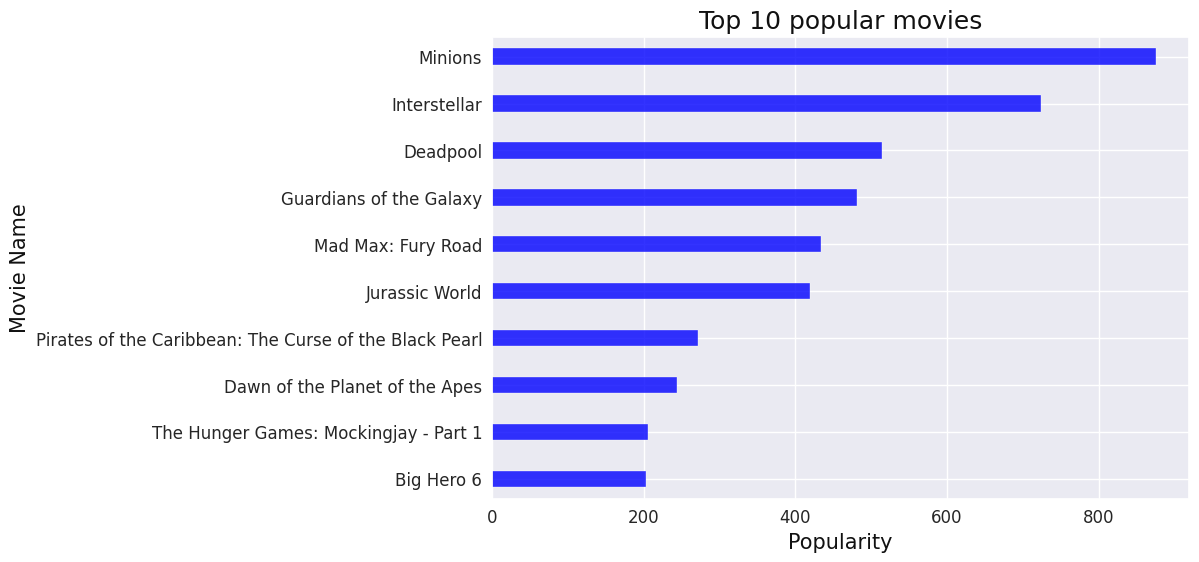

In [396]:
# Top 10 popular movies bar chart

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["blue"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Popularity",fontsize=15, color="k")
plt.title("Top 10 popular movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer:

I chose a horizontal bar chart for clear readability of long movie titles and effective visual comparison of popularity scores. It also efficiently displays the ranked data for easy interpretation.

##### 2. What is/are the insight(s) found from the chart?



Answer Here : The chart shows that "Avatar" is the most popular movie, followed by "Pirates of the Caribbean: At World's End" and "The Dark Knight Rises." There is a noticeable gap in popularity between the top three movies and the others. "John Carter" is the least popular among the top five.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The gained insights can help create a positive business impact by identifying high-performing movies, guiding future investments in similar genres or franchises. The popularity of "Avatar" and "Pirates of the Caribbean" suggests investing in sequels or related merchandise could be profitable. No insights suggest negative growth; however, the lower popularity of "John Carter" indicates that similar high-budget projects without strong audience interest could result in financial losses. This highlights the importance of market research before major investments.

#### Chart - 2 What's the top rated movies considering both (vote_count) and (vote average)? (top 10)


In [397]:
# Cheking top 10 vote_average movies and their vote_counts

movies.nlargest(10,"vote_average")[["original_title","vote_average","vote_count"]]

,original_title,vote_average,vote_count
3524,Stiff Upper Lips,10.0,1
4052,"Dancer, Texas Pop. 81",10.0,1
4254,Me You and Five Bucks,10.0,2
4668,Little Big Top,10.0,1
3999,Sardaarji,9.5,2
2392,One Man's Hero,9.3,2
1887,The Shawshank Redemption,8.5,8205
2975,There Goes My Baby,8.5,2
2802,The Prisoner of Zenda,8.4,11
3342,The Godfather,8.4,5893


In [398]:
# Cheking top 10 vote_counts and their average_vote

top_ten_rated = movies.nlargest(10,"vote_count")[["original_title","vote_average","vote_count"]]
top_ten_rated

,original_title,vote_average,vote_count
96,Inception,8.1,13752
65,The Dark Knight,8.2,12002
0,Avatar,7.2,11800
16,The Avengers,7.4,11776
788,Deadpool,7.4,10995
95,Interstellar,8.1,10867
287,Django Unchained,7.8,10099
94,Guardians of the Galaxy,7.9,9742
426,The Hunger Games,6.9,9455
127,Mad Max: Fury Road,7.2,9427


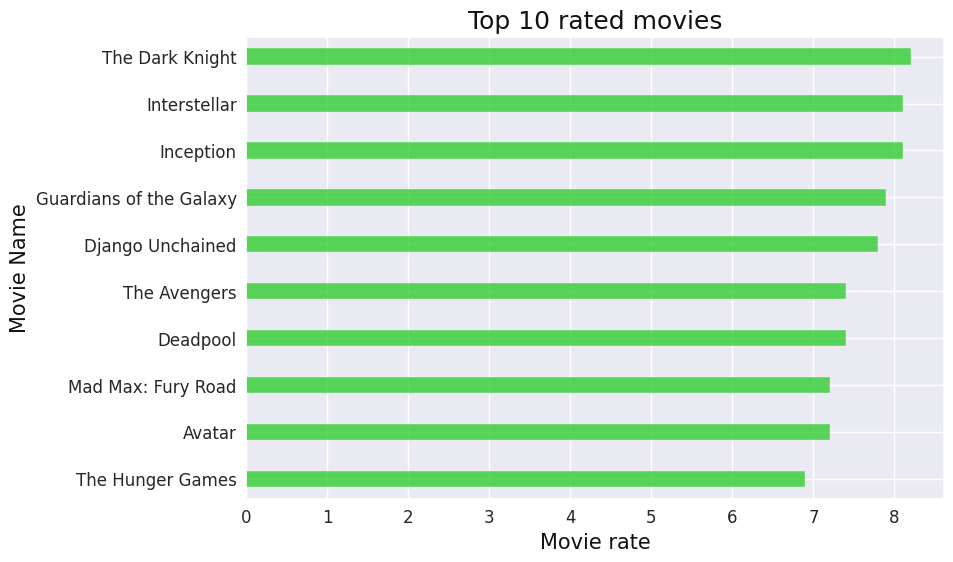

In [399]:
# Groupby top ten rated movies (with high vote counts)

top_ten_rated.groupby("original_title")["vote_average"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["limegreen"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie rate",fontsize=15, color="k")
plt.title("Top 10 rated movies", fontsize=18, color="k");


##### 1. Why did you pick the specific chart?

Answer Here.
The horizontal bar chart was chosen for its clarity in comparing the summed vote averages of the top 10 rated movies with high vote counts. Its layout accommodates long movie titles well and allows for easy visual comparison of ratings across titles.


##### 2. What is/are the insight(s) found from the chart?
Answer:
1.Movies with the highest vote counts generally have higher average ratings.

2.Certain films stand out for their exceptionally high cumulative ratings.

3.There is a correlation between popularity (measured by vote count) and viewer satisfaction (measured by average rating).

4.The top-rated movies encompass diverse genres, indicating broad audience appeal.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights into high-rated movies with substantial vote counts can positively impact business by guiding content acquisition and marketing strategies for increased audience engagement and revenue. However, overemphasis on popular metrics may neglect niche content and hinder long-term innovation, potentially limiting audience diversity and sustainable growth opportunities. Thus, a balanced approach is essential to leverage insights effectively while fostering creativity and maintaining market competitiveness.











#### Chart - 3 Which movies have the highest runtime? (top 10)


In [400]:
# check the movies which has highest runtime

most_watched = movies.nlargest(10,"runtime")[["original_title","runtime"]]
most_watched

,original_title,runtime
2390,Carlos,338.0
2637,The Company,276.0
1928,Gettysburg,254.0
1128,Cleopatra,248.0
2379,Hamlet,242.0
3515,Emma,240.0
3820,Gone with the Wind,238.0
1669,Once Upon a Time in America,229.0
4503,Woodstock,225.0
1112,Heaven's Gate,219.0


In [401]:
# Groupby most_watched movies
most_watched.groupby("original_title")["runtime"].sum().sort_values()

original_title
Heaven's Gate                  219.0
Woodstock                      225.0
Once Upon a Time in America    229.0
Gone with the Wind             238.0
Emma                           240.0
Hamlet                         242.0
Cleopatra                      248.0
Gettysburg                     254.0
The Company                    276.0
Carlos                         338.0
Name: runtime, dtype: float64

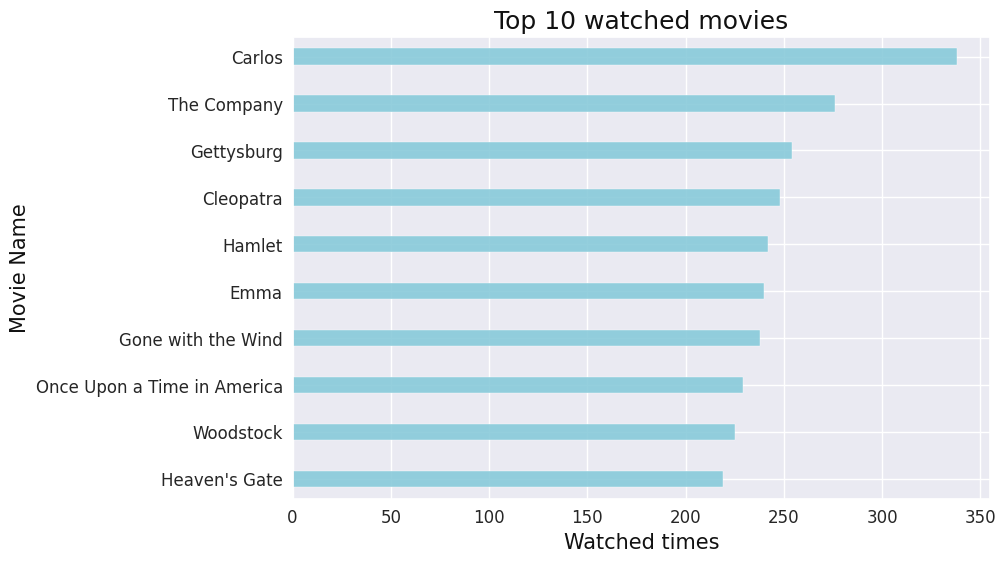

In [402]:
# most_watched movies bar chart

most_watched.groupby("original_title")["runtime"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["c"],
                                                                                 alpha = 0.9,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Watched times",fontsize=15, color="k")
plt.title("Top 10 watched movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer:
The horizontal bar chart was chosen for its ability to clearly compare the runtimes of movies, providing ample space for long movie titles and facilitating easy visual comparison of runtime lengths.








##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart reveals which movies have the longest runtimes, highlighting notable differences in length. It shows a diverse range of titles, suggesting that extended runtimes are common across various genres. This indicates that lengthy films can successfully engage viewers, providing valuable insight for content strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:

The insights can drive positive business impact by guiding content strategy towards acquiring or producing engaging, long-duration films and focusing marketing efforts on attracting dedicated viewers. However, overemphasis on long movies could alienate viewers preferring shorter content and lead to imbalanced resource allocation, limiting content diversity and audience reach.








The chart reveals which movies have the longest runtimes, highlighting notable differences in length. It shows a diverse range of titles, suggesting that extended runtimes are common across various genres. This indicates that lengthy films can successfully engage viewers, providing valuable insight for content strategy.

#### Chart - 4 Which year and which Month released highest number of movies?

In [403]:
high_year = movies.groupby("release_year")["original_title"].count().sort_values(ascending=False)

# Select the top 10 years with the highest number of movie releases
high_year = high_year.head(10)

# Display the result
high_year

KeyError: 'release_year'

In [ ]:
# high_years with most released movies bar chart

high_year.plot(kind="bar",
               rot = 0,
               width = 0.35,
               color=["m"],
               alpha = 0.8,
               fontsize = 12,
               figsize=(9,6),
              )

plt.ylabel("Number of movies",fontsize=15, color="k")
plt.xlabel("Movies released Year",fontsize=15, color="k")
plt.title("Top 10 years with highest number of released movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer Here.
The bar chart was chosen because it succinctly visualizes the top 10 years with the highest number of movie releases. Its simplicity and clarity allow for easy comparison of movie counts across different years, ensuring effective communication of trends in movie production over time.








##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart reveals which specific years had the highest number of movie releases, highlighting potential trends in film production over time. It provides insights into periods of prolific movie output and may suggest influences such as industry trends, economic factors, or cultural phenomena driving film production in those years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :
Identifying peak years of movie releases can positively impact business strategies by optimizing resource allocation and capitalizing on consumer trends. However, over-reliance on peak years may lead to heightened competition and potential box office saturation, affecting individual film success. Sustainable growth hinges on balancing short-term opportunities with long-term stability, ensuring strategic decisions align with evolving market dynamics and audience preferences.








#### Chart - 5 Which movie has the highest budget?

In [ ]:
# check movie with highest budget

max_budget = movies[movies.budget == movies.budget.max()]
max_budget[["original_title","budget"]]

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Which movie made the highest revenue?

In [ ]:
# check movie with highest revenue

max_revenue = movies[movies.revenue == movies.revenue.max()]
max_revenue[["original_title","revenue"]]

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 which production company made highest profit and which one has the highest budget?

In [ ]:
 # Explode the "production_companies" column to create separate rows for each company
movies = movies.explode("production_companies")

# Calculate total profit for each production company and sort in descending order
comp_profits = movies.groupby("production_companies")["profit"].sum().sort_values(ascending=False)

# Get the production company with the highest total profit
top_company = comp_profits.head(1)

print("Production company with the highest total profit:")
print(top_company)

In [ ]:
# check the production_companies highest budget

comp_profits = movies.groupby("production_companies")["budget"].sum().sort_values(ascending=False)
comp_profits[0:1]

In [ ]:
# Paramount Pictures compant total number of movies

paramount_total_movies = movies.query("production_companies == 'Paramount Pictures'")["original_title"].count()
paramount_total_movies

In [ ]:
#cheking the correlations

# Drop non-numeric columns or handle them appropriately
numeric_columns = movies.select_dtypes(include=['number']).columns
movies_numeric = movies[numeric_columns]

# Calculate correlations among numeric columns
correlations = movies_numeric.corr()

print("Correlation matrix:")
print(correlations)

In [ ]:
# heatmap

# Drop or handle non-numeric columns appropriately
numeric_columns = movies.select_dtypes(include=['number']).columns
movies_numeric = movies[numeric_columns]

# Create heatmap of correlations
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(movies_numeric.corr(), annot=True, ax=ax)

plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose the heatmap specifically because it efficiently handles the display of correlation matrices, providing a clear and concise visualization of relationships between multiple variables through color gradients and annotations.








##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insights from the heatmap chart reveal the strength and direction of correlations between variables in the dataset. Strong positive correlations are indicated by darker shades, while negative correlations are represented by lighter shades. This visualization helps identify which variables move together or in opposite directions, guiding further analysis or decision-making based on these relationships.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights from identifying strong positive correlations can inform strategic decisions such as optimizing resources or enhancing product features that positively influence business outcomes. Conversely, identifying strong negative correlations may reveal areas where investment or effort could be redirected to mitigate negative impacts on growth or operational efficiency, thereby fostering a more balanced approach to business strategy

#### Chart - 9 Is there a correlation between budget and profit?

In [ ]:

# Scatter plot between budget and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'budget',
                  y = 'profit',
                  color=["goldenrod"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.

 chose a scatter plot to visualize the relationship between movie budgets and profits because it effectively displays individual data points, allowing for easy identification of patterns or trends. Scatter plots are ideal for examining correlations between continuous variables like budget and profit, offering insights into how changes in one variable may affect the other. They provide a straightforward way to assess the strength and direction of the relationship visually.








##### 2. What is/are the insight(s) found from the chart?

Answer Here
From the scatter plot of movie budgets versus profits, insights can be drawn regarding:

Correlation Strength: Observing whether higher budgets consistently result in higher profits.

Outlier Detection: Identifying movies with unusually high or low profits relative to their budgets.

Pattern Recognition: Recognizing any nonlinear relationships or clusters that suggest varying profitability across different budget ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights from the scatter plot can drive positive business impact by optimizing resource allocation based on budget-profit trends, identifying profitable investment opportunities, and mitigating risk. However, if the plot reveals a consistent lack of profitability despite higher budgets, it may signal potential negative growth, prompting reassessment of investment strategies to avoid financial losses.

#### Chart - 10 Is there a correlation between vote_count and profit?

In [ ]:

# Scatter plot between vote_count and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'profit',
                  color=["crimson"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.

I chose a scatter plot to visualize the relationship between vote_count and profit because it effectively displays individual data points, allowing for easy identification of patterns or trends in how the number of votes correlates with profitability. Scatter plots are ideal for examining correlations between continuous variables and provide insights into potential relationships that may exist between these two metrics in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
From the scatter plot of vote_count versus profit, insights can be drawn regarding:

Popularity Impact: Higher vote counts tend to correlate positively with higher profits, suggesting popular movies often achieve better financial outcomes.
Outlier Identification: Detection of outliers where movies with relatively low vote counts achieve unexpectedly high profits, indicating potential niche market successes.


Pattern Recognition: Observation of any clustering or dispersion patterns that illustrate how profitability varies with varying levels of audience engagement, guiding strategies for marketing and audience targeting.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from the scatter plot, showing higher profits with increasing vote counts and potential outliers, can positively impact business strategies by refining marketing efforts and capitalizing on niche successes. However, identifying patterns where low vote counts correlate with low profits may caution against investments in less engaging projects, thereby mitigating potential negative impacts on growth.

#### Chart - 11 Is there a correlation between vote_count and popularity?

> Add blockquote



In [ ]:
# Chart - 11 visualization code
# Scatter plot between vote_count and popularity

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'popularity',
                  color=["firebrick"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?


Answer Here.
I selected a scatter plot to illustrate how vote_count relates to popularity, offering a clear depiction of their correlation through individual data points.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The scatter plot reveals a positive relationship between vote_count and popularity, highlighting trends in audience engagement and identifying potential outliers based on their relative popularity given vote counts.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from the scatter plot, such as understanding the positive correlation between vote_count and popularity, can aid in shaping effective marketing strategies and optimizing audience engagement efforts, potentially leading to positive business impacts.









#### Chart - 12 Is there a correlation between runtime and profit?

In [ ]:
# Scatter plot between runtimes and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'runtime',
                  y = 'profit',
                  color=["mediumturquoise"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.
I chose a scatter plot to visualize the relationship between runtime and profit because it effectively displays individual data points, allowing for clear observation of how movie runtimes correlate with profitability

##### 2. What is/are the insight(s) found from the chart?

Answer Here
rom the scatter plot of runtime versus profit, the insights gained include:

Optimal Film Length: Identification of runtime ranges that consistently yield higher profits.
Financial Performance: Understanding how variations in film duration impact profitability, aiding in strategic decisions.
Risk Assessment: Recognition of outliers where runtime does not align with expected profit levels, prompting risk mitigation strategies.
Business Strategy: Utilizing runtime insights to optimize resource allocation and enhance overall financial outcomes in film production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
he insights from the scatter plot can potentially create positive business impacts by:

Optimizing Investment: Guiding decisions on film length to maximize profitability, thereby enhancing revenue streams.
Audience Engagement: Aligning runtime with audience preferences to boost viewer satisfaction and box office performance.
Cost Efficiency: Improving cost-effectiveness by focusing resources on film lengths that historically yield higher profits.
However, insights revealing a consistent pattern of low profitability across varying runtimes could lead to negative growth. This might indicate challenges in capturing audience interest or inefficient resource allocation, prompting adjustments in film production strategies to mitigate financial losses and sustain growth in competitive markets.

#### Chart - 13

##### 1. Why did you pick the specific chart?

In [ ]:
movies.head()

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
movies.isna().sum()

In [ ]:
movies.head()

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Textual Columns

In [ ]:
movies.head()


In [405]:
 #Create the 'content_detail' column by concatenating the specified columns
movies['content_detail'] = (
    movies['cast'] + ' ' +
    movies['Director'] + ' ' +
    movies['keywords'] + ' ' +
    movies['title'] + ' ' +
    movies['country'] + ' ' +
    movies['overview']
)


TypeError: can only concatenate list (not "str") to list

In [ ]:
movies.head()

#### 2. Lower Casing

In [ ]:
# Lower Casing

In [ ]:
movies.head()

In [ ]:
movies.head()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

.1. k-Means¶
Goal: Partition data into k clusters.

Algorithm: Each observation belongs to the cluster with the nearest mean. The algorithm iteratively assigns points to clusters and recalculates cluster centers until convergence.
Optimization: Minimize within-cluster sum of squares

Hyperparameters: k (Number of clusters), Initialization method
Advanced Considerations:

Mini-batch k-Means: A variant that uses a random subset of data points in each iteration, speeding up convergence.

Choosing k: The number of clusters k is a hyperparameter. Methods like the Elbow method or the Silhouette method can be used to find an optimal k.

Pros & Cons: Fast and scalable, but sensitive to initial conditions and requires specifying k.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***